<a href="https://www.kaggle.com/code/smujtabahussain/deep-learning-01?scriptVersionId=277946795" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Notebook 1: Perceptron vs. MLP

This notebook demonstrates the fundamental difference between a single Perceptron and a Multi-Layer Perceptron (MLP).

**The Goal:** To show that a Perceptron can only solve linearly separable problems, while an MLP can solve non-linear problems like XOR.

## 1. Imports

In [1]:
!pip install mlxtend

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 73.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.7.2 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.2 which is incompatible.


In [2]:
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

## 2. The Famous "XOR" Problem

Let's create the data for the XOR problem. This is a classic non-linearly separable dataset.

* (0, 0) -> 0
* (0, 1) -> 1
* (1, 0) -> 1
* (1, 1) -> 0

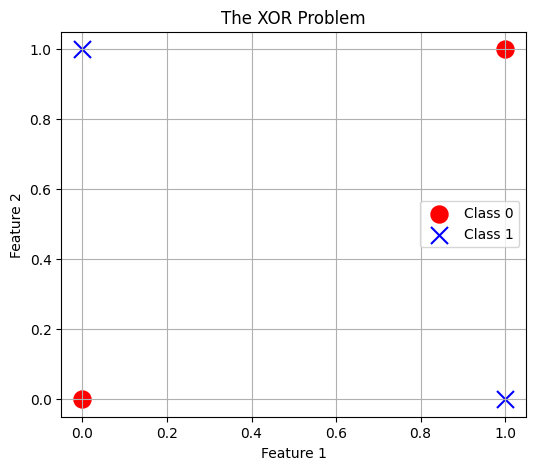

In [3]:
# Create the XOR data
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y = np.array([0, 1, 1, 0])

# Plot the data
plt.figure(figsize=(6, 5))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], marker='o', s=150, color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], marker='x', s=150, color='blue', label='Class 1')
plt.title('The XOR Problem')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

**Observation:** You can't draw a *single straight line* to separate the circles (Class 0) from the crosses (Class 1).

## 3. Attempt 1: The Perceptron

Let's train a `Perceptron` from `scikit-learn` on this data and see what happens.

Perceptron Accuracy: 50.0%


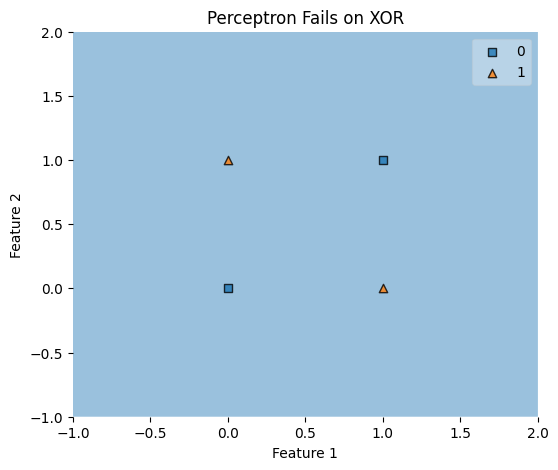

In [4]:
# Initialize the Perceptron
# eta0 is the learning rate
# random_state for reproducible results
perceptron = Perceptron(eta0=0.1, max_iter=1000, random_state=42)

# Train the model
perceptron.fit(X, y)

# Check accuracy
print(f"Perceptron Accuracy: {perceptron.score(X, y) * 100}%")

# Plot the decision boundary
plt.figure(figsize=(6, 5))
plot_decision_regions(X, y, clf=perceptron)
plt.title('Perceptron Fails on XOR')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

**Result:** The Perceptron fails. The decision boundary it draws is a straight line, which is fundamentally incapable of separating this data.

## 4. Attempt 2: The Multi-Layer Perceptron (MLP)

Now let's try an `MLPClassifier`. We will give it one hidden layer with a few neurons.

MLP Accuracy: 100.0%


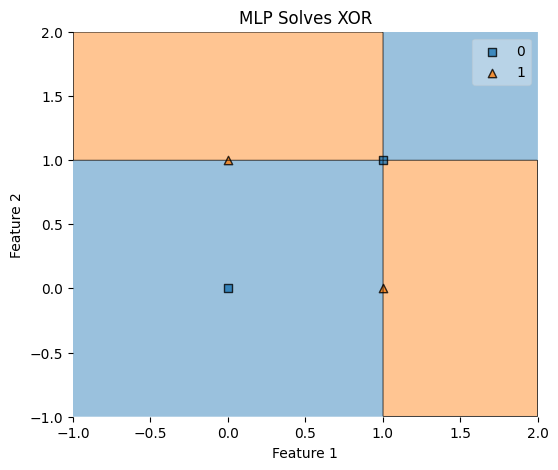

In [5]:
# Initialize the MLP Classifier
# hidden_layer_sizes=(4,) means ONE hidden layer with 4 neurons
# activation='relu' is the modern, standard activation function
# solver='adam' is a standard optimizer
# max_iter to give it plenty of time to converge
mlp = MLPClassifier(
    hidden_layer_sizes=(10,),
    activation='relu',
    solver='adam',
    max_iter=5000,
    random_state=42
)

# Train the model
mlp.fit(X, y)

# Check accuracy
print(f"MLP Accuracy: {mlp.score(X, y) * 100}%")

# Plot the decision boundary
plt.figure(figsize=(6, 5))
plot_decision_regions(X, y, clf=mlp)
plt.title('MLP Solves XOR')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## 5. Conclusion

**Success!** The MLP achieves 100% accuracy.

Notice the decision boundary is **non-linear**. The MLP was able to "bend" the decision space by using its hidden layer and non-linear 'relu' activation function. It effectively learned a new representation of the data where the classes *were* separable.

This jump in capability—from a simple linear Perceptron to a non-linear MLP—is the foundational concept of deep learning.